In [373]:
import importlib
import lab2
import copy
import numpy as np
from cv2 import imread, imwrite, imshow, waitKey, COLOR_BGR2RGB, cvtColor, vconcat, hconcat, putText, \
    FONT_HERSHEY_SIMPLEX, resize
import time

#from diffusion import take_params, get_probs, fill_graph_edges, diffusion_alg, labeling
# importlib.reload(lab2)

Read the image as float array, rescale it and set the parameters:

In [374]:
filename = "field4.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 50
eps = 0.2
epsilon_lower_border=10**(-20)

Zero iteration:

- take parameters of normal distribution from sky and ground on image;
- create an array of probabilities of class 0 and class 1 for each pixel;
- create start graph with edges depends on epsilon and probabilities;

In [375]:
start_time = time.time()

mean0, mean1, cov0, cov1 = lab2.take_params(img1_res)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)

zero_iter_time = time.time() - start_time
print("Zero iteration time:  %s seconds; " % zero_iter_time)

Zero iteration time:  0.9293899536132812 seconds; 


Some start graph edges:

In [376]:
print(graph[5, 2] , "\n")
print(graph[-2, -5])

[ -19.97604203  -73.82031627  -72.15883095 -130.39755435] 

[-779.98715076 -400.07397503 -393.29688893  -17.77816236]


Diffusion algorithm:

In [377]:
start_time = time.time()

new_graph = lab2.diffusion_alg(n_iterations, graph)

alg_time = time.time() - start_time
print("Diffusion time: %s seconds;" % alg_time)
print("time per diffusion iteration: ", alg_time / n_iterations)

Diffusion time: 1.9778273105621338 seconds;
time per diffusion iteration:  0.039556546211242674


Same edges after diffusion:

In [378]:
print(new_graph[5, 2])
print(new_graph[-2, -5])
# np.savetxt('0.txt', new_graph[500:540,:30,0],fmt='%.3f', delimiter='\t')
# np.savetxt('1.txt', new_graph[500:540,:30,1],fmt='%.3f',  delimiter='\t')
# np.savetxt('2.txt', new_graph[500:540,:30,2],fmt='%.3f',  delimiter='\t')
# np.savetxt('3.txt', new_graph[500:540,:30,3],fmt='%.3f',  delimiter='\t')


[-5.50401432e-21 -9.56689205e-21 -5.63970121e-21 -1.12462287e+02]
[-5.89907669e-36 -1.73408816e+00 -2.12521082e+02 -2.87618307e-38]


Now we need to pick labeling for graph:

In [379]:
start_time = time.time()

graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)

alg_time = time.time() - start_time
print("Labeling time: %s seconds;" % alg_time)
# print("time per Labeling iteration: ", alg_time / n_iterations)

labeling...
Start epsilon:  373.96145061689856
For epsilon =  186.98072530844928 : looking...
For epsilon =  93.49036265422464 : looking...
For epsilon =  46.74518132711232 : looking...
For epsilon =  23.37259066355616 : looking...
For epsilon =  11.68629533177808 : looking...
For epsilon =  5.84314766588904 : looking...
For epsilon =  2.92157383294452 : looking...
For epsilon =  1.46078691647226 : looking...
For epsilon =  0.73039345823613 : looking...
For epsilon =  0.365196729118065 : looking...
For epsilon =  0.1825983645590325 : looking...
For epsilon =  0.09129918227951625 : looking...
For epsilon =  0.045649591139758125 : looking...
For epsilon =  0.022824795569879062 : looking...
For epsilon =  0.011412397784939531 : looking...
For epsilon =  0.005706198892469766 : looking...
For epsilon =  0.002853099446234883 : looking...
For epsilon =  0.0014265497231174414 : looking...
For epsilon =  0.0007132748615587207 : looking...
For epsilon =  0.00035663743077936035 : looking...
For e

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


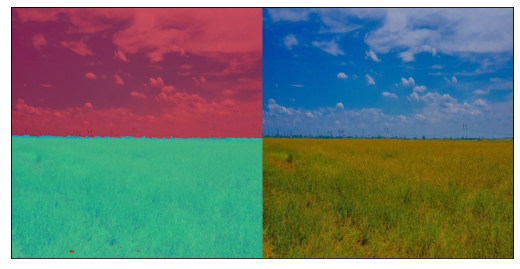

True

In [380]:
print(final_labels)

result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)